## Etapa 1: Instalação da biblioteca

In [1]:
%pip install pmdarima -q

Note: you may need to restart the kernel to use updated packages.


## Etapa 2: Importação das bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

## Etapa 3: Carregamento da base de dados

In [21]:
dataset = pd.read_csv('../../assets/AirPassengers.csv')

In [22]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [23]:
dataset = dataset.set_index(pd.to_datetime(dataset["Month"].values))
dataset.drop("Month", axis=1, inplace=True)
dataset

,#Passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


In [24]:
dataset.head()

,#Passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
time_series = dataset['#Passengers']

In [26]:
time_series

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

## Etapa 4: Exploração da série temporal

In [27]:
time_series[1]

118

In [28]:
time_series['1949-02']

1949-02-01    118
Name: #Passengers, dtype: int64

In [29]:
time_series[datetime(1949,2,1)]

118

In [30]:
time_series['1950-01-01':'1950-07-31']

1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [31]:
time_series[:'1950-07-31']

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [32]:
time_series['1950']

1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [33]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [34]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

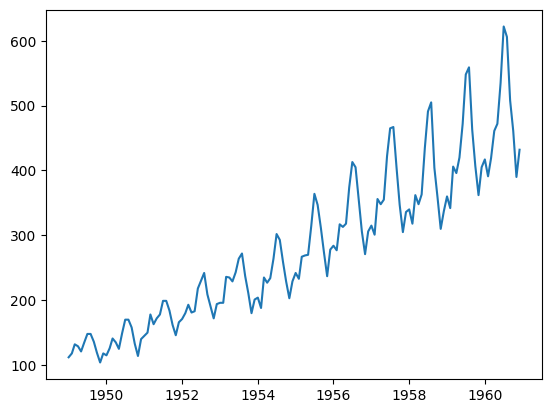

In [35]:
plt.plot(time_series)

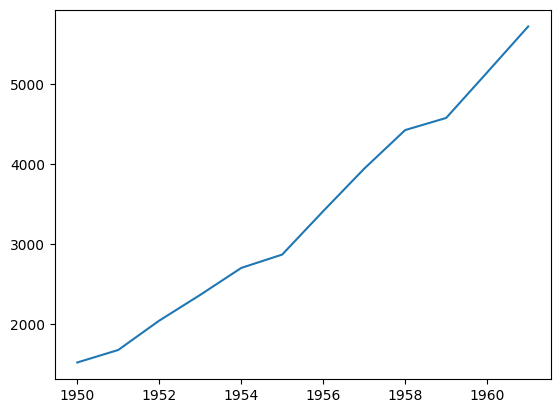

In [36]:
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)

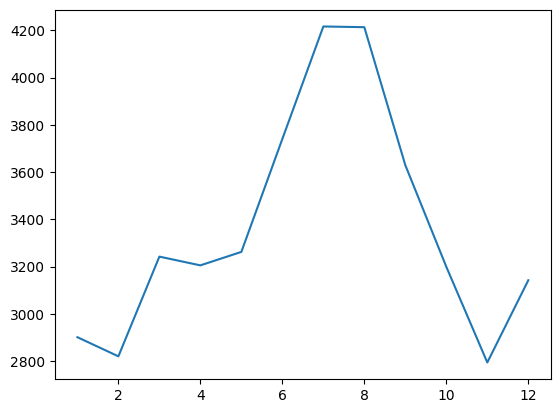

In [37]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)

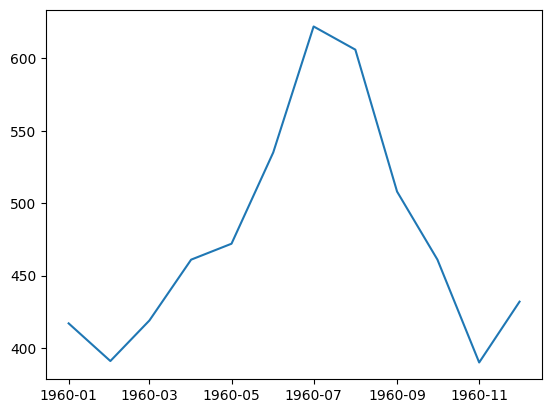

In [38]:
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas)

## Etapa 5: Decomposição da série temporal

In [ ]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

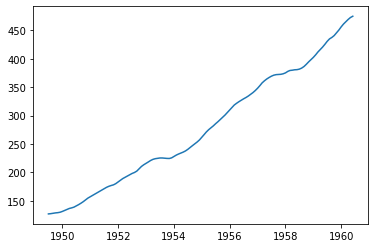

In [ ]:
plt.plot(tendencia)

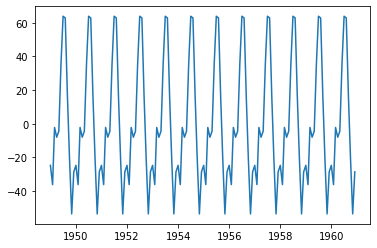

In [ ]:
plt.plot(sazonal)

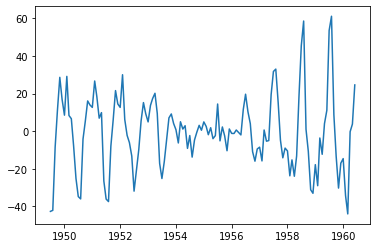

In [ ]:
plt.plot(aleatorio)

## Etapa 6: Previsões com ARIMA

In [ ]:
# Parâmetors P, Q e D
model = auto_arima(time_series)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary startin

In [ ]:
model.order

(4, 1, 3)

In [ ]:
predictions = model.predict(n_periods=24)

In [ ]:
predictions

array([467.57380591, 490.49456508, 509.13694426, 492.55476915,
       495.30596911, 475.94780369, 476.33983726, 475.55213805,
       472.35382517, 483.88967624, 475.57019749, 485.92154353,
       479.13363555, 480.98744366, 482.22141257, 476.21104211,
       483.94282847, 475.84737398, 482.79427311, 479.01197772,
       479.51865291, 482.449467  , 476.97396672, 483.51103504])

## Etapa 7 - Gráfico das previsões

In [ ]:
len(time_series)

144

In [ ]:
train = time_series[:130]
train.shape

(130,)

In [ ]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [ ]:
test = time_series[130:]
test.shape

(14,)

In [ ]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [ ]:
model2 = auto_arima(train, suppress_warnings=True)

In [ ]:
test.index

DatetimeIndex(['1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [ ]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690513
1959-12-01,334.857453
1960-01-01,342.488596
1960-02-01,375.944536
1960-03-01,424.126298
1960-04-01,473.151462
1960-05-01,510.388404
1960-06-01,527.724271
1960-07-01,523.268358


In [ ]:
test

Month
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

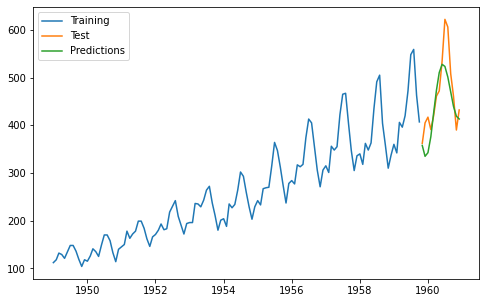

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();